In [25]:
try:
  import seaborn as sns
  import pandas as pd
  import matplotlib.pyplot as plt
  sns.set()

except Exception as e:
  print(f'Installing packages: {e}')
  !pip install pandas matplotlib

In [26]:
col_names = ['date','country/region','new_cases','new_deaths','total_cases','total_deaths','total_recovery']
day1 = pd.read_csv('./data/jordan1.csv', names=col_names)
day2 = pd.read_csv('./data/jordan2.csv', names=col_names)
day3 = pd.read_csv('./data/jordan3.csv', names=col_names)
day4 = pd.read_csv('./data/jordan4.csv', names=col_names)
day5 = pd.read_csv('./data/jordan5.csv', names=col_names)
day6 = pd.read_csv('./data/jordan6.csv', names=col_names)

In [15]:
data = pd.concat([day1,day2,day3,day4,day5,day6])
data.to_csv('./data/gen.csv', index=False)

In [16]:
genData = pd.read_csv('data/gen.csv')
genData['new_cases'] = genData['new_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['new_deaths'] = genData['new_deaths'].replace(r'\W', '', regex=True).astype('int')
genData['total_cases'] = genData['total_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_deaths'] = genData['total_deaths'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_recovery'] = genData['total_recovery'].str.replace(r'\W', '', regex=True).astype('int')

genData

,date,country/region,new_cases,new_deaths,total_cases,total_deaths,total_recovery
0,2021-3-20,Jordan,5205,87,526666,5788,426754
1,2021-3-21,Jordan,8789,88,535455,5876,434167
2,2021-3-22,Jordan,9269,109,544724,5985,441239
3,2021-3-23,Jordan,9003,92,553727,6077,447888
4,2021-3-24,Jordan,9130,104,562857,6181,456188
5,2021-3-25,Jordan,8433,96,571290,6277,463893


In [17]:
genData.isna().sum()

date              0
country/region    0
new_cases         0
new_deaths        0
total_cases       0
total_deaths      0
total_recovery    0
dtype: int64

In [18]:
genData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            6 non-null      object
 1   country/region  6 non-null      object
 2   new_cases       6 non-null      int64 
 3   new_deaths      6 non-null      int64 
 4   total_cases     6 non-null      int64 
 5   total_deaths    6 non-null      int64 
 6   total_recovery  6 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 464.0+ bytes


In [19]:
graphD = genData.set_index('date')

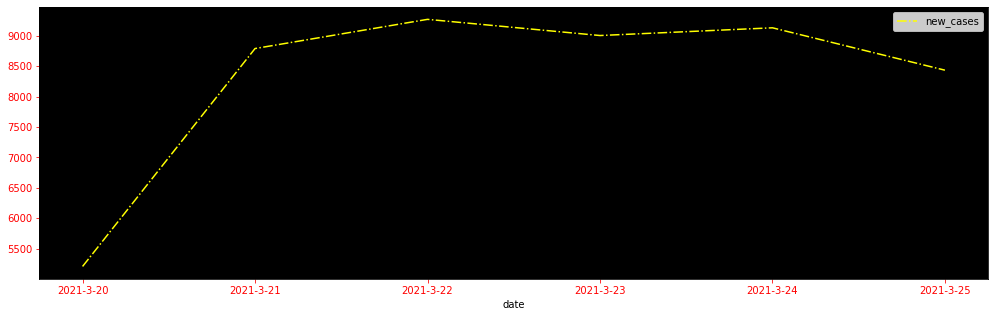

In [20]:
graphData = graphD.loc['2021-3-20' :'2021-3-25'][['new_cases']].plot(color=['yellow'],kind='line',figsize=(17,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.show()

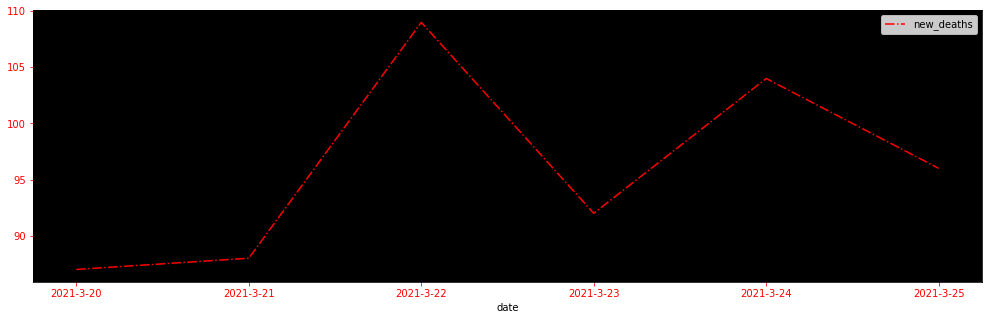

In [21]:
graphData = graphD.loc['2021-3-20' :'2021-3-25'][['new_deaths']].plot(color=['red'],kind='line',figsize=(17,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.show()

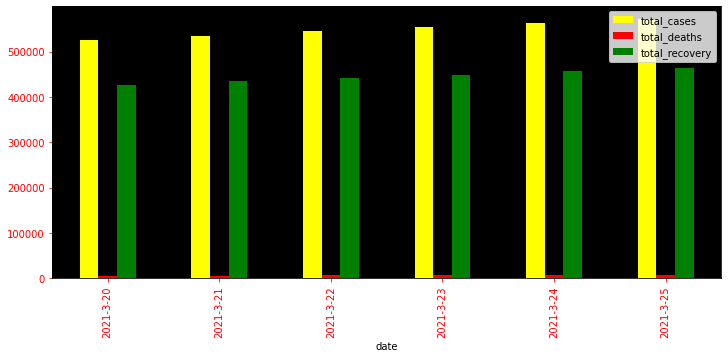

In [22]:
graphData = graphD.loc['2021-3-20' :'2021-3-25'][['total_cases','total_deaths','total_recovery']].plot(color=['yellow','red','green'],kind='bar',figsize=(12,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.show()

Text(0.5, 1.0, 'total_recovery')

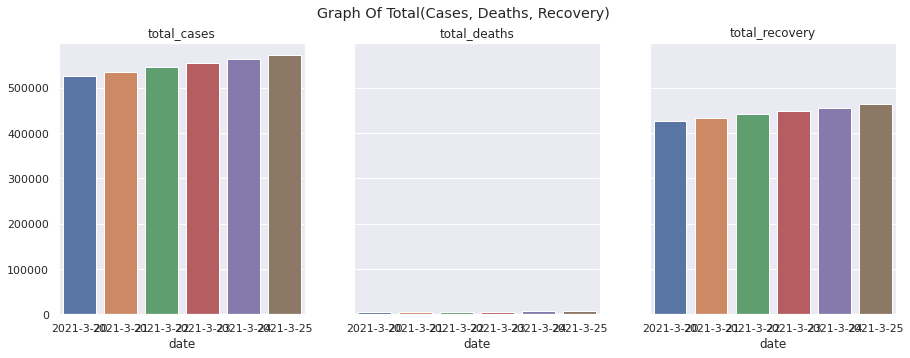

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Graph Of Total(Cases, Deaths, Recovery)')

# Total Cases
sns.barplot(ax=axes[0], x=graphD['total_cases'].index, y=graphD['total_cases'].values)
axes[0].set_title(graphD['total_cases'].name)

# Total Deaths
sns.barplot(ax=axes[1], x=graphD['total_deaths'].index, y=graphD['total_deaths'].values)
axes[1].set_title(graphD['total_deaths'].name)

# Total Recovery
sns.barplot(ax=axes[2], x=graphD['total_recovery'].index, y=graphD['total_recovery'].values)
axes[2].set_title(graphD['total_recovery'].name)